# Tutorial on how to use an IBM Q machine for free

We will start by preparing a circuit which we can run on the quantum computer.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute
from qiskit.visualization import plot_histogram

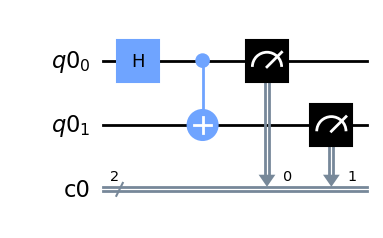

In [3]:
n=2
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr, cr)

qc.h(0)
qc.cx(0,1)
qc.measure(qr,cr)

qc.draw('mpl')

### Access to the IBM Q machine

At first we will need to make an account at the homepage of IBM Q ([https://quantum-computing.ibm.com/login](https://quantum-computing.ibm.com/login)).
You will find an API-token on the welcome page after you logged in, which you can copy by clicking the two squares next to it (compare image).

![alt text](imgs/welcome_IBM.png)

We will now prepare you local computer to access one of the IBM Q machine for which we need that API-token.
This token can be saved on your device by using the command in line 3 with your token instead of `YOUR API TOKEN`.
You need to execute this line only once as it saves the string on your device.

In [4]:
from qiskit import IBMQ

#IBMQ.save_account('YOUR API TOKEN')
IBMQ.load_account()

/tmp/ipykernel_11018/1306087503.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

As next step we will prepare the least busy IBM Q machine with at least $n$ qubits as backend .

In [5]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                       not x.configuration().simulator and x.status().operational == True))
print("least busy backend: ", backend)


least busy backend:  ibmq_lima


No we can run are circuit jsut as we would do with a simulator backend but with the least busy IBM Q machine as backend.

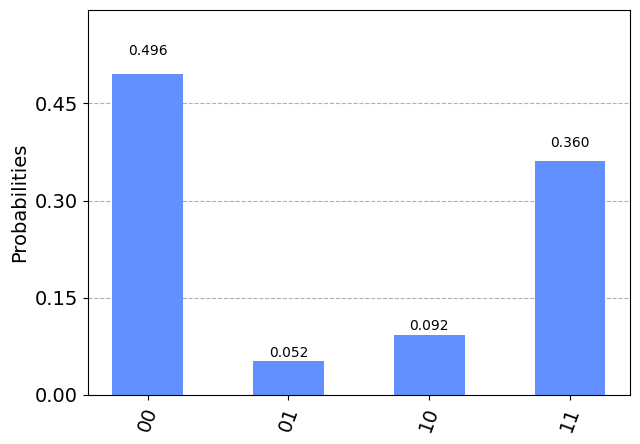

In [6]:
job = execute(qc, backend, shots = 1024)
res = job.result()
plot_histogram(res.get_counts())

This could take some while as you are waiting in a queue.